# Electrical characteristic analysis of sample CA12X_C5

In [1]:
paths = ['../CA12X_C5/CA12X_C5_current_from_1e-7_to_3.5e-7A/CA12X_C5_current_from_1e-7_to_3.5e-7A-20220413145630']

# Select the experiment from list of the paths, eg. paths[0] picks the first experiment, paths[1] the second one and so on 
data_path = paths[0]

with open(data_path, "r", encoding='utf-8') as file_desc:
    text = file_desc.read()
    print(text)

Electrical characterization experiment of current biased Ca2RuO4 crystal along C-axis as a function of temperature with 2-wire connection. Two conductive pads are created by sputtering Ag on both side of the sample.
Name of the sample: CA12X_C5
Area: 2.588e-2cm2
Length: 0.153e-1cm
Current source from 1e-7A to 3.5e-7A

### Experiment 20220413145630 ###
Date 2022-04-13 start at 14:55:10 end at 14:56:04 duration 0:00:54
Temperature range from 113.00°K to 112.99°K
Resistivity:
	 average 6.1775e+07𝛀 cm
	 minimum 1.4690e+07𝛀 cm at 112.99°K
	 maximum 1.0495e+08𝛀 cm at 113.00°K
Voltage:
	 average 6.9976e+00V
	 minimum 1.8035e+00V at 113.00°K
	 maximum 1.1919e+01V at 113.00°K


<img style="float:left" src="../CA12X_C5/CA12X_C5_Info/Ca_12x_C5_1.jpg" width=300 />
<img src="../CA12X_C5/CA12X_C5_Info/ca12xc5_20220407_150752_montaggio_campione.jpg" width=300 />

## Diffrattogramma

<img src="../CA12X_C5/CA12X_C5_Info/CA12X_C5.jpg" />

## Annotation

Dall'analisi dello spettro a raggi X non è evidente la presenza di inclusioni di rutenio metallico in maniera significativa; è presente una fase Ca113  Per il collegamento elettrico sono state create due piazzole conduttive depositando su entrambe le facce Ag con il metodo della polverizzazione catodica, in atmosfera con Argon per la durata di 4 minuti e 30 secondi, alla pressione di lavoro di 8 10-2 torr e il voltaggio di 1,9kV. Per delineare le piazzole è stato usato un foglio di paraffina, PARAFILM. Durante la rimozione del film di paraffina si è staccato un piccolo pezzo dal campione. La resistenza iniziale misurata a temperatura ambiente è di circa 235 Ohm. 
Il giorno 12/04/2022 il campione è stato smontato dal discendente per rifare i contatti, al montaggio la resistenza misurata a temperatura ambiente è di circa 220 Ohm

## Loading experiment data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 6]

In [3]:
data = np.load(data_path + '.npz', allow_pickle=True)
DT=data['datetime']
V=data['voltage']
R=data['resistance']
T=data['temperature']
I=data['current_source']
J=data['current_density']
E=data['electric_field']
RHO=data['resistivity']
thickness = V/E
area = I/J
# Density in mA/cm2
J = J * 1000

### Data description

- DT datetime
- V voltage measurements in Volts
- R resistance measurements in Ohm
- T temperature measurements in °K
- I current source in Amps
- J current density in mA/cm^2
- E electric field in V/cm
- RHO resistivity in Ohm cm

In [4]:
print(f"Area {area[0]:.4e}cm2\nThickness:{thickness[0]:.4e}cm")

Area 2.5880e-02cm2
Thickness:1.5300e-02cm


### Temperature

In [5]:
temp_msg = ""
temp_const = True
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
    temp_msg = f"Temperature is constant: {T[0]:.2f}°K"   
elif diff <= 1.5: 
    temp_msg = f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K"
else:
    temp_msg = f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K"
    temp_const = False
print(temp_msg)

Temperature is constant: 113.00°K


### Input source

In [6]:
source_msg = ""
source_const = True
if np.max(I) == np.min(I): 
    source_msg = f"Source is constant: {I[0]:.2e}A ({J[0]:.2e}mA/cm2)"
else:
    source_msg = f"Source span from {np.min(I):.2e}A ({np.min(J):.2e}mA/cm2) to {np.max(I):.2e}A ({np.max(J):.2e}mA/cm2)"
    source_const = False
print(source_msg)

Source span from 1.00e-07A (3.86e-03mA/cm2) to 3.50e-07A (1.35e-02mA/cm2)


## Analysis

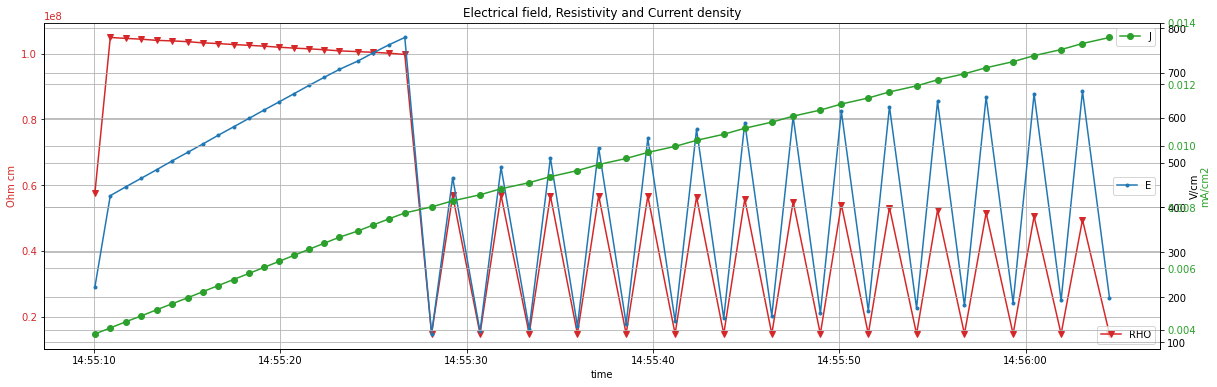

In [7]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field, Resistivity and Current density")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='C3')
ax1.tick_params(axis='y', labelcolor='C3')
ax1.plot(DT, RHO, 'v-', color='C3', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, '.-', label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax3 = ax1.twinx()

if not temp_const:
    ax3.set_ylabel('°K', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, T, 'o-', label='T', color='C2')
    ax3.legend(loc='upper right')

if not source_const:
    ax3.set_ylabel('mA/cm2', color='C2')
    ax3.tick_params(axis='y', labelcolor='C2')
    ax3.plot(DT, J, 'o-', label='J', color='C2')
    ax3.legend(loc='upper right')

ax1.legend(loc='lower right')
ax2.legend(loc='right')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

### Peaks detection

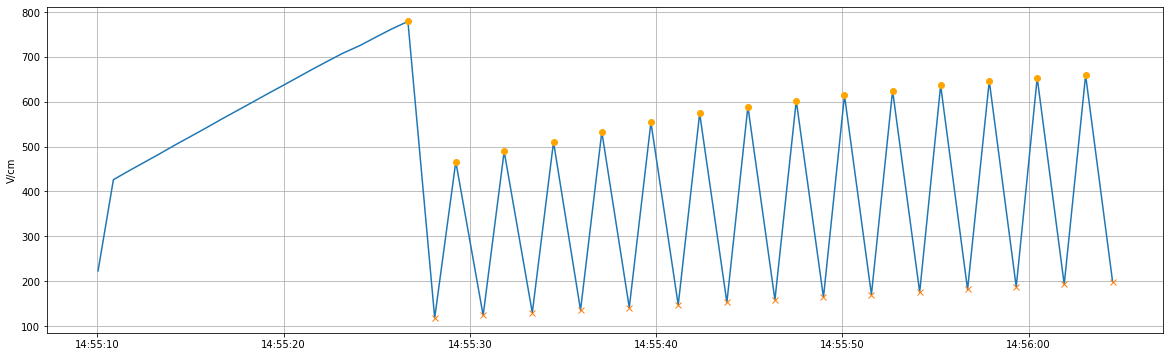

In [8]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E, prominence=0)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [9]:
print(f"First peak with value {E[peaks[0]]:.1f} V/cm, {RHO[peaks[0]]:.3e} Ohm cm at T:{T[peaks[0]]:.2f}°K and J:{J[peaks[0]]:.3e} mA/cm2\
\nLast peak  with value {E[peaks[-1]]:.1f} V/cm, {RHO[peaks[-1]]:.2e} Ohm cm at T:{T[peaks[-1]]:.2f}°K and J:{J[peaks[-1]]:.3e} mA/cm2")

First peak with value 779.0 V/cm, 9.979e+07 Ohm cm at T:113.00°K and J:7.807e-03 mA/cm2
Last peak  with value 659.1 V/cm, 4.95e+07 Ohm cm at T:112.99°K and J:1.333e-02 mA/cm2


#### Peaks amplitude

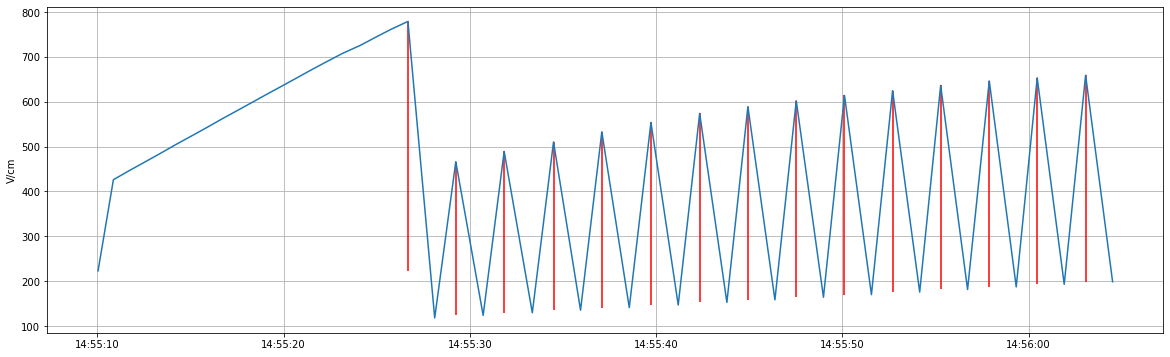

In [10]:
plt.plot(DT, E)
plt.vlines(DT[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [11]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm at T:{T[np.argmin(diff)]:.2f}°K and J:{J[np.argmin(diff)]:.3e} mA/cm2\
      \nMaximum amplitude {np.max(diff):.1f} at V/cm at T:{T[np.argmax(diff)]:.2f}°K and J:{J[np.argmax(diff)]:.3e} mA/cm2\
      \nAverage amplitude {np.mean(diff):.1f} V/cm")

Minimum amplitude 342.7 V/cm at T:113.00°K and J:4.061e-03 mA/cm2      
Maximum amplitude 556.1 at V/cm at T:113.00°K and J:3.864e-03 mA/cm2      
Average amplitude 430.1 V/cm


#### Time interval between peaks [ms]

Average 2598 milliseconds


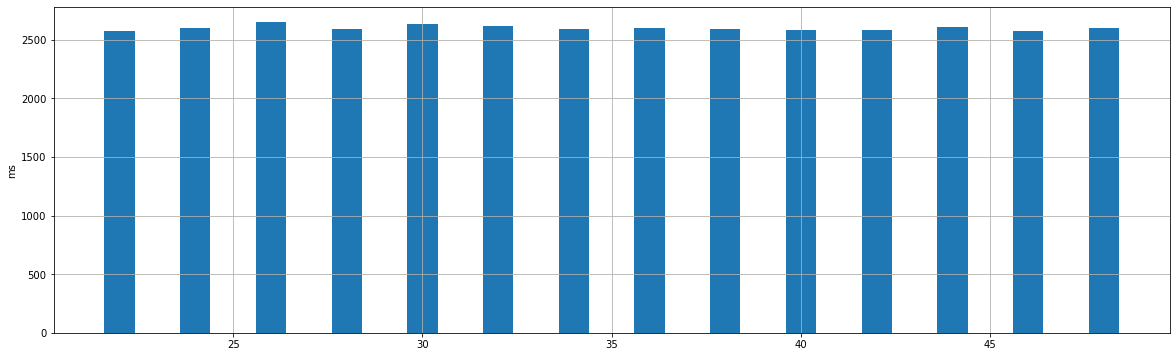

In [12]:
diff = np.ediff1d(DT[peaks].astype(dtype='datetime64[ms]'))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int))
plt.grid(True)
print(f"Average {np.mean(diff)}")